In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [4]:
#import the data
#add data
data = pd.read_csv('advertising.csv')
print('\nShape \n',data.shape)
print('\nColumns \n',data.columns)

print('\nSummary Stat \n',data.describe())

print('\nInfo')
print(data.info())


Shape 
 (200, 4)

Columns 
 Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Summary Stat 
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB
None


In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


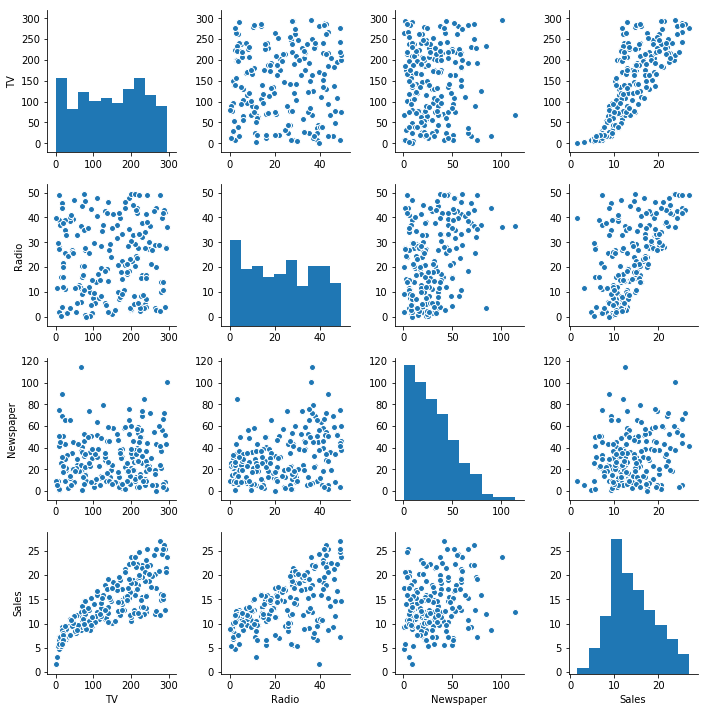

In [11]:
#pair plot of all variable in data
sns.pairplot(data)

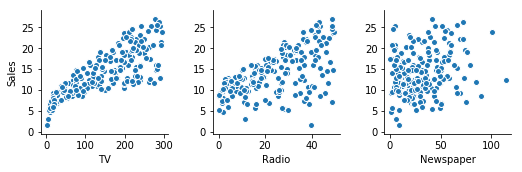

In [12]:
#plotting data between features and response variable
sns.pairplot(data,x_vars=['TV', 'Radio', 'Newspaper'],y_vars=['Sales'])

In [95]:
'''
There is little relation between nespaper and sales
'''
#splitting into features and response variable
x = data.drop(['Sales'],axis=1)
y = data['Sales']

print('x shape',x.shape)
print('features\n',x.columns)
print('y shape',y.shape)

x shape (200, 3)
features
 Index(['TV', 'Radio', 'Newspaper'], dtype='object')
y shape (200,)


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)

In [98]:
model = LinearRegression()
model.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
#get the coefficients of features
intercept = model.intercept_
coefs = model.coef_
coefs = pd.DataFrame(coefs,columns=['Coefficient'],index=x.columns)

print('\nIntercept:\n',intercept)
print('\nCoefficients:\n',coefs)


Intercept:
 3.173759374608146

Coefficients:
            Coefficient
TV            0.049691
Radio         0.146928
Newspaper     0.004270


In [100]:
#prediction
y_pred = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [101]:
#calculate model performance
mse = mean_squared_error(y_train,y_pred)
r2 = r2_score(y_train,y_pred)

print('\nMSE\n',mse)
print('\nR^2\n',r2)



MSE
 3.326843304561081

R^2
 0.8749946632925865


In [102]:
#cheking the p-values of the features using statsmodel package
import statsmodels.api as sm
ols_model = sm.OLS(y_train,sm.add_constant(x_train)).fit()
ols_model.params

const        2.880255
TV           0.043915
Radio        0.200280
Newspaper    0.001844
dtype: float64

In [103]:
summary = ols_model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     439.9
Date:                Thu, 16 May 2019   Prob (F-statistic):           8.76e-70
Time:                        09:26:39   Log-Likelihood:                -262.41
No. Observations:                 140   AIC:                             532.8
Df Residuals:                     136   BIC:                             544.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8803      0.360      7.994      0.0

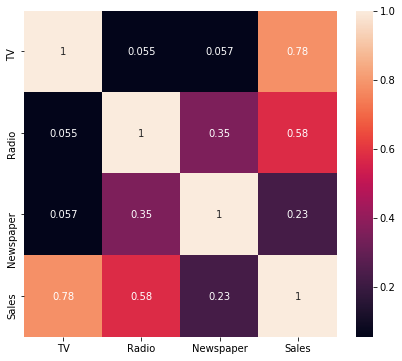

In [104]:
#plot a heatmap to check the correlation
plt.figure(figsize=(7,6))
sns.heatmap(data.corr(),annot=True)

In [105]:
#updating the model by remove the Newspaper feature
x = x.drop(['Newspaper'],axis=1)
print('\nNew Columns\n',x.columns)


New Columns
 Index(['TV', 'Radio'], dtype='object')


In [106]:
#splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=0)
print('features\n',x_train.columns)

#fitting new model
model = LinearRegression()
model.fit(x_train,y_train)

#prediction
y_pred_new = model.predict(x_train)

#get the coefficients of features
intercept = model.intercept_
coefs = model.coef_
coefs = pd.DataFrame(coefs,columns=['Coefficient'],index=x.columns)
print('\nIntercept:\n',intercept)
print('\nCoefficients:\n',coefs)

#calculate model performance metrices
mse = mean_squared_error(y_train,y_pred_new)
r2 = r2_score(y_train,y_pred_new)

print('\nMSE\n',mse)
print('\nR^2\n',r2)

features
 Index(['TV', 'Radio'], dtype='object')

Intercept:
 2.909895690512924

Coefficients:
        Coefficient
TV        0.043967
Radio     0.200995

MSE
 2.4877454061475825

R^2
 0.9065235649327258


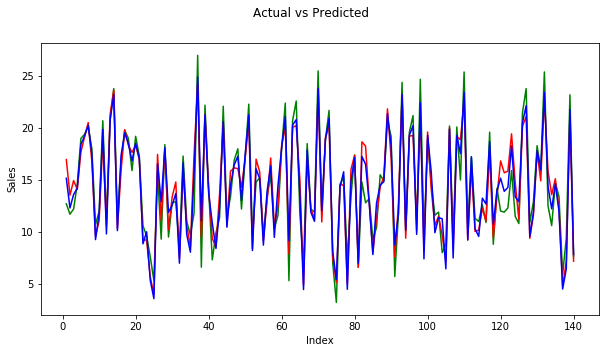

In [110]:
#actual vs predicted for both the models
rng =list(range(1,x_train.shape[0]+1,1))
fig =plt.figure(figsize=(10,5))
plt.plot(rng,y_train,color='g')
plt.plot(rng,y_pred,color='r')
plt.plot(rng,y_pred_new,color='b')
fig.suptitle('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.show()

In [111]:
ols_model = sm.OLS(y_train,sm.add_constant(x_train)).fit()
print(ols_model.params)

summary = ols_model.summary()
print(summary)

const    2.909896
TV       0.043967
Radio    0.200995
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     664.3
Date:                Thu, 16 May 2019   Prob (F-statistic):           3.11e-71
Time:                        09:28:58   Log-Likelihood:                -262.45
No. Observations:                 140   AIC:                             530.9
Df Residuals:                     137   BIC:                             539.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------